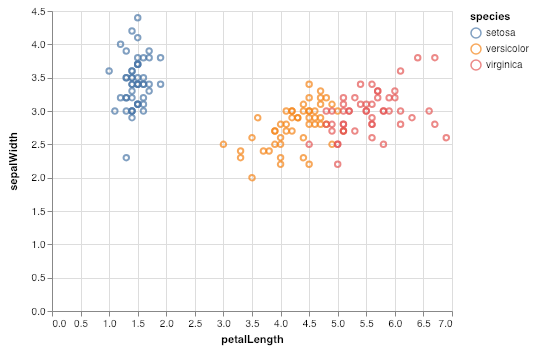

In [1]:
import altair as alt
alt.renderers.enable('notebook')
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x = 'petalLength',
    y = 'sepalWidth',
    color = 'species'

)

In [2]:
#To facet the species

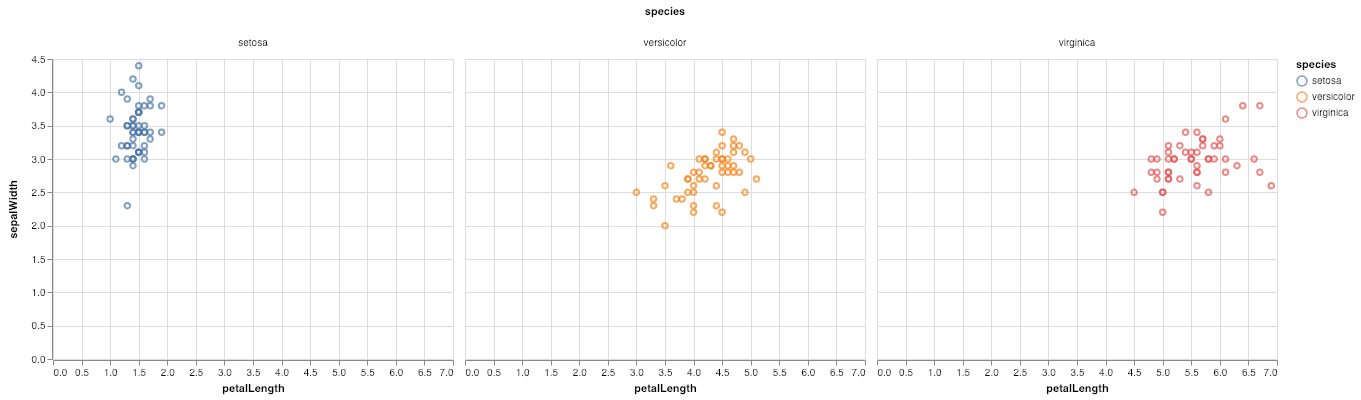

In [3]:
alt.Chart(iris).mark_point().encode(
    x = 'petalLength',
    y = 'sepalWidth',
    color = 'species',
    column = "species"
).interactive()

## Main tutorial
* Think data, marks and encodings

In [4]:
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [5]:
alt.Chart(cars).mark_point()

In [55]:
alt.Chart(cars[:1]).mark_point().to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'url': 'altair-data-4dcf8a7479ee09664ddb3ca5832a83f5.json',
  'format': {'type': 'json'}},
 'mark': 'point',
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.6.0.json'}

Use autocomplete to find chart mark types

alt.Chart.mark_

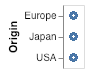

In [7]:
alt.Chart(cars).mark_point().encode(
    y='Origin'
)

Encoding types: x, y, color, opacity, shape, size, row, column

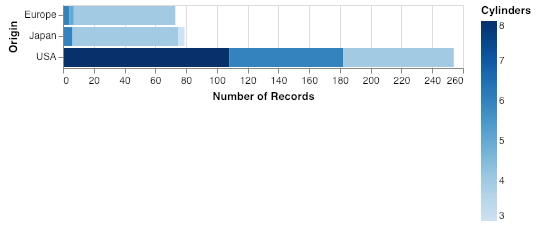

In [8]:
alt.Chart(cars).mark_bar().encode(
        y='Origin',
        x='count()',
        color='Cylinders'
)

Aggregate transforms are available beyond count()

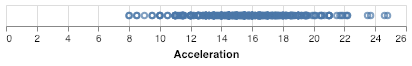

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Acceleration'
)

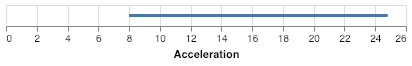

In [10]:
alt.Chart(cars).mark_line().encode(
    x='Acceleration'
)

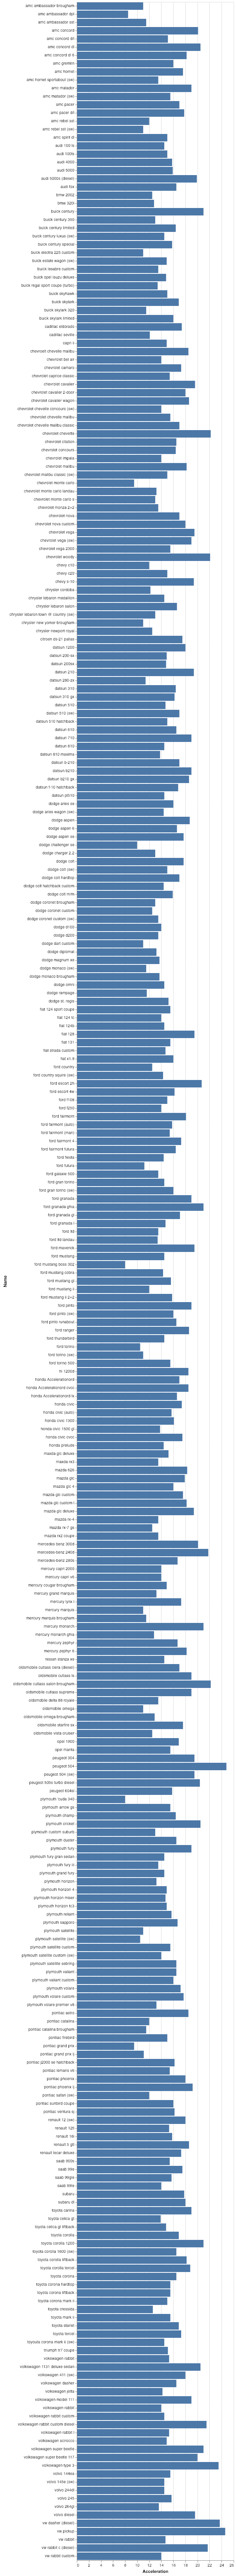

In [11]:
alt.Chart(cars).mark_bar().encode(
    x='Acceleration',
    y = 'Name'
)

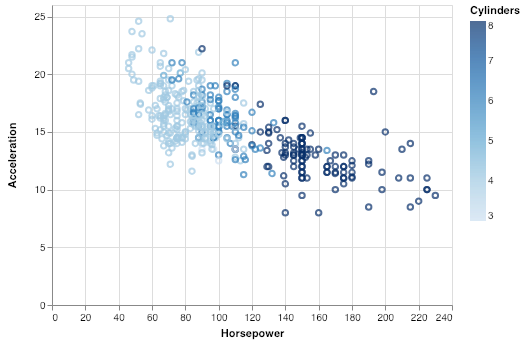

In [12]:
alt.Chart(cars).mark_point().encode(
    x="Horsepower",
    y="Acceleration",
    color="Cylinders"
)

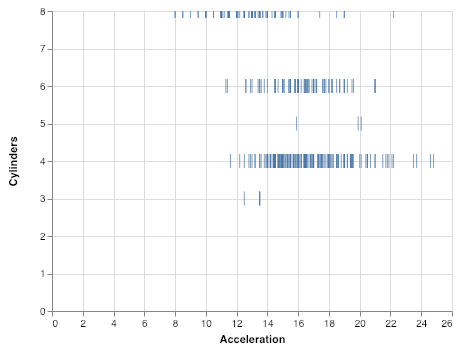

In [13]:
alt.Chart(cars).mark_tick().encode(
    y = "Cylinders",
    x = "Acceleration"
).interactive()

Encoding types: Q (quantitative), N (nominal), O (ordered categorical), T (Date/time) 

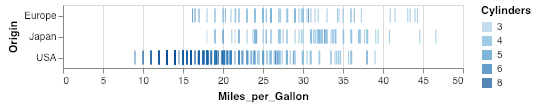

In [14]:
alt.Chart(cars).mark_tick().encode(
    x = "Miles_per_Gallon:Q",
    y = 'Origin:N',
    color = "Cylinders:O"
)

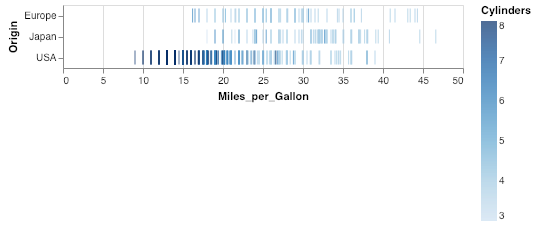

In [15]:
alt.Chart(cars).mark_tick().encode(
    x = "Miles_per_Gallon:Q",
    y = 'Origin:N',
    color = "Cylinders:Q"
)

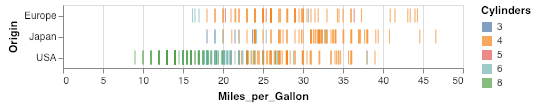

In [16]:
alt.Chart(cars).mark_tick().encode(
    x = "Miles_per_Gallon:Q",
    y = 'Origin:N',
    color = "Cylinders:N"
)

Are there plots that can be made better by changing the type?

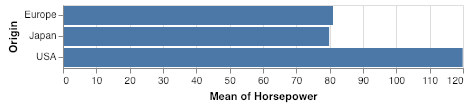

In [17]:
alt.Chart(cars).mark_bar().encode(
    y="Origin:N",
    x="mean(Horsepower):Q"
)

## Binning and encoding

In [18]:
#In Pandas
cars.groupby('Origin')['Miles_per_Gallon'].mean()

Origin
Europe    27.891429
Japan     30.450633
USA       20.083534
Name: Miles_per_Gallon, dtype: float64

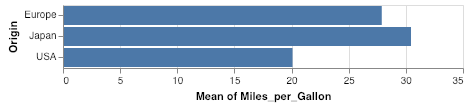

In [19]:
#In Altair
alt.Chart(cars).mark_bar().encode(
    y="Origin",
    x='mean(Miles_per_Gallon)'
)

## Stacked charts

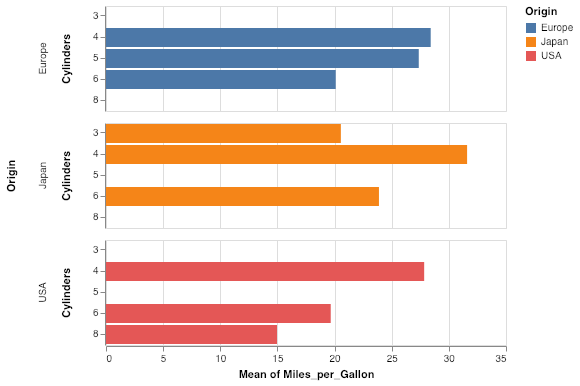

In [20]:
alt.Chart(cars).mark_bar().encode(
    y="Cylinders:O",
    row="Origin",
    color="Origin",
    x='mean(Miles_per_Gallon)'
)

## Histograms

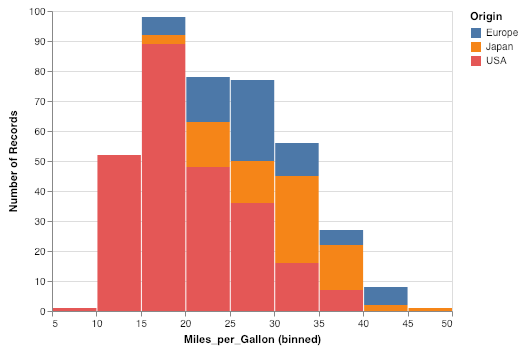

In [21]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=True),    
    y=alt.Y('count()'),
    color=alt.Color("Origin")
)

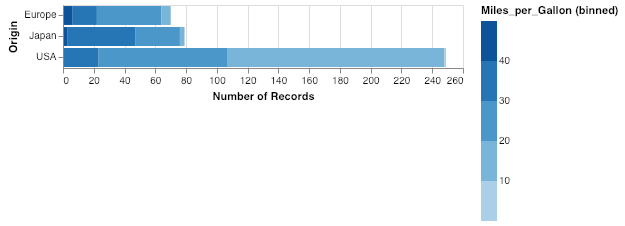

In [22]:
#Change things around and we can get another view of the data
alt.Chart(cars).mark_bar().encode(
    color=alt.Color('Miles_per_Gallon', bin=True),    
    x=alt.X('count()'),
    y=alt.Y("Origin")
)

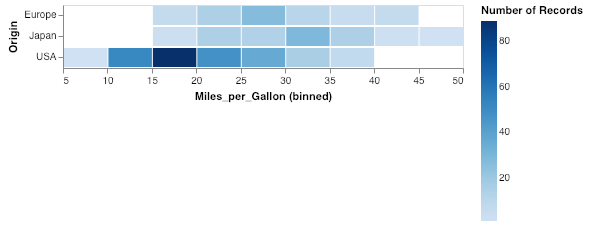

In [23]:
#A heatmap:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=True),    
    color=alt.Color('count()'),
    y=alt.Y("Origin")
)    

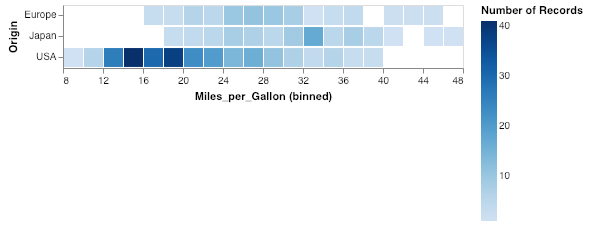

In [24]:
#To alter bin sizes
#A heatmap:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=20)),    
    color=alt.Color('count()'),
    y=alt.Y("Origin")
)  

## Other encodings

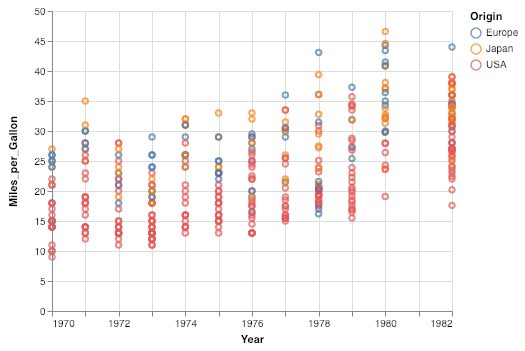

In [25]:
alt.Chart(cars).mark_point().encode(
    x='Year:T',
    color='Origin',
    y='Miles_per_Gallon'
)

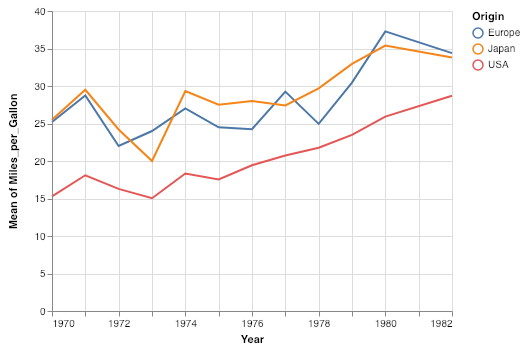

In [26]:
#To improve resolution of this chart...
alt.Chart(cars).mark_line().encode(
    x='Year:T',
    color='Origin',
    y='mean(Miles_per_Gallon)'
)

## Confidence intervals

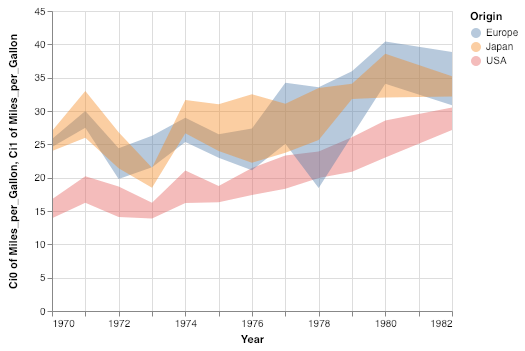

In [27]:
#In order to get an idea of spread over time
alt.Chart(cars).mark_area(opacity=.4).encode(
    x='Year:T',
    color='Origin',
    y='ci0(Miles_per_Gallon)',
    y2='ci1(Miles_per_Gallon)'
)

## Time binning

In [28]:
temps = data.seattle_temps()
temps.head()

,date,temp
0,2010-01-01 00:00:00,39.4
1,2010-01-01 01:00:00,39.2
2,2010-01-01 02:00:00,39.0
3,2010-01-01 03:00:00,38.9
4,2010-01-01 04:00:00,38.8


In [56]:
#Will cause error because the data has 8,500 rows and Altair can only handle, 5,000
#alt.Chart(temps).mark_line().encode(
#    x='date:T',
#    y='temp:Q'
#)

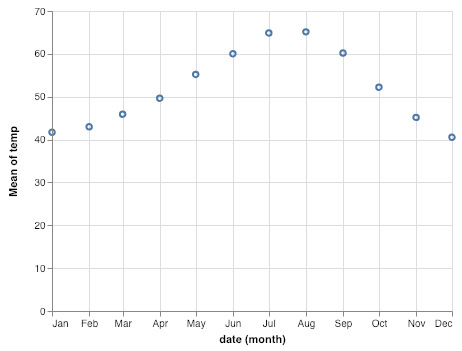

In [44]:
#In order to get around this problem

alt.data_transformers.enable('json')

#The data can then be aggregated
alt.Chart(temps).mark_point().encode(
    x=alt.X('date:T', timeUnit="month"),
    y='mean(temp):Q'
)

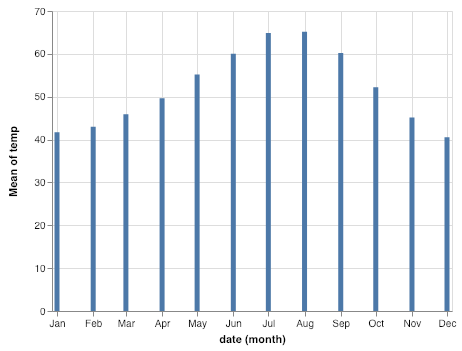

In [43]:
alt.Chart(temps).mark_bar().encode(
    x=alt.X('date:T', timeUnit="month"),
    y='mean(temp):Q'
)

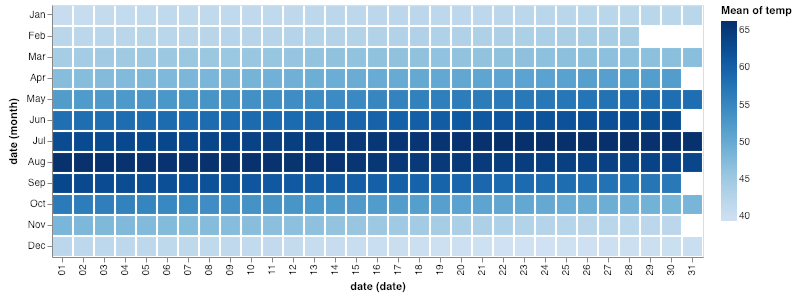

In [52]:
#To create a heatmap we can convert the dates to Ordinal and plot date on x and month on y
alt.Chart(temps).mark_bar().encode(
    y=alt.Y('date:O', timeUnit="month"),
    x=alt.X('date:O', timeUnit="date"),
    color='mean(temp):Q'
)

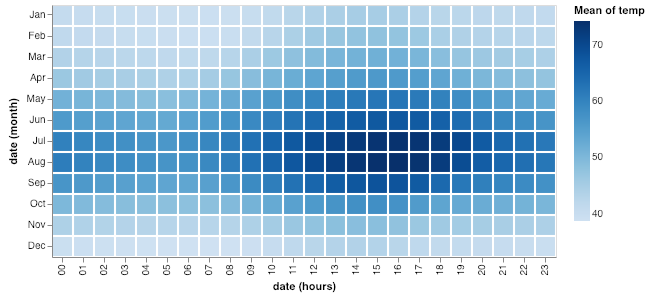

In [53]:
alt.Chart(temps).mark_bar().encode(
    y=alt.Y('date:O', timeUnit="month"),
    x=alt.X('date:O', timeUnit="hours"),
    color='mean(temp):Q'
)